<a href="https://colab.research.google.com/github/mostlydipo/AI_ML_DL-concepts_with_python/blob/main/Logistic_regression(classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
ndd=pd.read_csv('diabetes_data_2.csv')
ndd.head()

,pregnancy,plasma_glucose_test,blood_pressure,Triceps_skinfold_thickness,serum_insulin,bmi,dpg,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
ndd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancy                   768 non-null    int64  
 1   plasma_glucose_test         768 non-null    int64  
 2   blood_pressure              768 non-null    int64  
 3   Triceps_skinfold_thickness  768 non-null    int64  
 4   serum_insulin               768 non-null    int64  
 5   bmi                         768 non-null    float64
 6   dpg                         768 non-null    float64
 7   Age                         768 non-null    int64  
 8    Diabetes                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
ndd.describe()

,pregnancy,plasma_glucose_test,blood_pressure,Triceps_skinfold_thickness,serum_insulin,bmi,dpg,Age,Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
ndd=ndd.drop(['pregnancy', 'blood_pressure', 'Triceps_skinfold_thickness', 'serum_insulin','bmi','dpg'], axis=1)

In [16]:
ndd.head()

,plasma_glucose_test,Age,Diabetes
0,148,50,1
1,85,31,0
2,183,32,1
3,89,21,0
4,137,33,1


In [26]:
x=ndd.iloc[:,: -1].values
y=ndd.iloc[:, -1].values

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=1/3, random_state=0)

In [33]:
logre= LogisticRegression()
logre.fit(x_train, y_train)

LogisticRegression()

In [36]:
print('number of mislabeled points out of a total of %d points: %d'
    %(x_test.shape[0], (y_test != logre.predict(x_test)).sum()))

print('our accuracy is %.2f:' % logre.score(x_test, y_test))

number of mislabeled points out of a total of 256 points: 71
our accuracy is 0.72:


Text(0, 0.5, 'y')

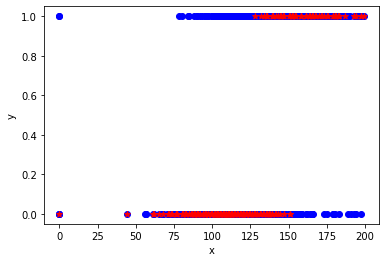

In [37]:
fig1, ax1=plt.subplots()
ax1.scatter(x[:,0], y, color='blue')
ax1.scatter(x_test[:,0], logre.predict(x_test), color='red', marker='*')

ax1.set_xlabel('x')
ax1.set_ylabel('y')